In [42]:
import pandas as pd
import ast

df_similar_so = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_error_analysis_relations_in_similar_so_all.csv')
df_similar_so.head(2)

,so_pair,name_relation,eval_type,relation_type,counts,is_similar,so_to_p_standard_Hybrid,so_to_p_standard_ER,so_to_p_hybrid_Hybrid,so_to_p_hybrid_ER,...,predicted_relation_hybrid_Hybrid,predicted_relation_hybrid_ER,euclidean_dist_standard_Hybrid,euclidean_dist_standard_ER,euclidean_dist_hybrid_Hybrid,euclidean_dist_hybrid_ER,cosine_sim_standard_Hybrid,cosine_sim_standard_ER,cosine_sim_hybrid_Hybrid,cosine_sim_hybrid_ER
0,"(500) Days of Summer, _ ,2009 Sundance Film Fe...","('/film/film/film_festivals', '/film/film/rele...",train,"('M-1', 'M-1')","(280, 262)",True,"(0, 0)","(2, 1)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/film_festivals,13.807630,3.476251,12.885740,10.733234,0.727376,0.525105,0.663774,0.627073
1,"(500) Days of Summer, _ ,United Kingdom",('/film/film/distributors./film/film_film_dist...,train,"('M-1', 'M-N')","(168, 14121)",False,"(0, 1)","(6, 12)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/release_date_s./film/film_regional_...,13.493464,4.926343,15.633004,15.075353,0.601617,0.199831,0.232598,0.229358


In [43]:
df_M1vsMN = df_similar_so[df_similar_so.relation_type.isin(["('M-1', 'M-N')", "('M-N', 'M-1')"])]
df_M1vsMN = df_M1vsMN.name_relation.apply(ast.literal_eval).value_counts().to_frame().reset_index().rename(columns={'index': 'pair_rel', 'name_relation': 'count'})
set_of_M1vsMN_relations = set(sum(df_M1vsMN.pair_rel, ()))
print('number of relations in M1vsMN:', len(set_of_M1vsMN_relations))


number of relations in M1vsMN: 62


In [44]:
df_ER_train = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_metric_train.csv')
df_ER_train['eval_type'] = 'train'
df_ER_valid = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_metric_valid.csv')
df_ER_valid['eval_type'] = 'valid'

df_ER = pd.concat([df_ER_train, df_ER_valid])
df_ER['eval_metric'] = 'ER'

key_columns = ['relation', 'id', 'count', 'relation_type', 'eval_type', 'eval_metric', ]

df_standard_ER = df_ER[key_columns + ['mean_reciprocal_rank_filtered_with_test_relation_standard']].rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR'})
df_standard_ER['training_objective'] = 'standard'
df_hybrid_ER = df_ER[key_columns + ['mean_reciprocal_rank_filtered_with_test_relation_hybrid']].rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR'})
df_hybrid_ER['training_objective'] = 'hybrid'

df_ER_MRR = pd.concat([df_standard_ER, df_hybrid_ER])
df_ER_MRR


,relation,id,count,relation_type,eval_type,eval_metric,MRR,training_objective
0,/award/award_nominee/award_nominations./award/...,8,15989,M-N,train,ER,0.091224,standard
1,/film/film/release_date_s./film/film_regional_...,13,12893,M-N,train,ER,0.102084,standard
2,/award/award_nominee/award_nominations./award/...,19,12157,M-N,train,ER,0.296169,standard
3,/people/person/profession,17,10945,M-N,train,ER,0.208030,standard
4,/film/actor/film./film/performance/film,6,9494,M-N,train,ER,0.166321,standard
...,...,...,...,...,...,...,...,...
218,/business/business_operation/operating_income....,213,1,M-1,valid,ER,1.000000,hybrid
219,/location/us_county/county_seat,190,1,1-1,valid,ER,0.043478,hybrid
220,/celebrities/celebrity/celebrity_friends./cele...,119,1,M-N,valid,ER,0.166667,hybrid
221,/location/hud_county_place/county,111,1,M-1,valid,ER,1.000000,hybrid


In [45]:
df_Hybrid_train = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_metric_train.csv')
df_Hybrid_train['eval_type'] = 'train'
df_Hybrid_valid = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_hybrid_error_analysis_metric_valid.csv')
df_Hybrid_valid['eval_type'] = 'valid'

df_ER = pd.concat([df_Hybrid_train, df_Hybrid_valid])
df_ER['eval_metric'] = 'Hybrid'

key_columns = ['relation', 'id', 'count', 'relation_type', 'eval_type', 'eval_metric', ]

df_standard_ER = df_ER[key_columns + ['mean_reciprocal_rank_filtered_with_test_relation_standard']].rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR'})
df_standard_ER['training_objective'] = 'standard'
df_hybrid_ER = df_ER[key_columns + ['mean_reciprocal_rank_filtered_with_test_relation_hybrid']].rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR'})
df_hybrid_ER['training_objective'] = 'hybrid'

df_Hybrid_MRR = pd.concat([df_standard_ER, df_hybrid_ER])
df_Hybrid_MRR

,relation,id,count,relation_type,eval_type,eval_metric,MRR,training_objective
0,/award/award_nominee/award_nominations./award/...,8,15989,M-N,train,Hybrid,0.238136,standard
1,/film/film/release_date_s./film/film_regional_...,13,12893,M-N,train,Hybrid,0.917744,standard
2,/award/award_nominee/award_nominations./award/...,19,12157,M-N,train,Hybrid,0.999602,standard
3,/people/person/profession,17,10945,M-N,train,Hybrid,0.999804,standard
4,/film/actor/film./film/performance/film,6,9494,M-N,train,Hybrid,0.976968,standard
...,...,...,...,...,...,...,...,...
218,/business/business_operation/operating_income....,213,1,M-1,valid,Hybrid,1.000000,hybrid
219,/location/us_county/county_seat,190,1,1-1,valid,Hybrid,0.071429,hybrid
220,/celebrities/celebrity/celebrity_friends./cele...,119,1,M-N,valid,Hybrid,0.125000,hybrid
221,/location/hud_county_place/county,111,1,M-1,valid,Hybrid,1.000000,hybrid


In [46]:
df_MRR = pd.concat([df_ER_MRR, df_Hybrid_MRR])
df_MRR['model'] = df_MRR['training_objective'] + '_' + df_MRR['eval_metric']
df_MRR

,relation,id,count,relation_type,eval_type,eval_metric,MRR,training_objective,model
0,/award/award_nominee/award_nominations./award/...,8,15989,M-N,train,ER,0.091224,standard,standard_ER
1,/film/film/release_date_s./film/film_regional_...,13,12893,M-N,train,ER,0.102084,standard,standard_ER
2,/award/award_nominee/award_nominations./award/...,19,12157,M-N,train,ER,0.296169,standard,standard_ER
3,/people/person/profession,17,10945,M-N,train,ER,0.208030,standard,standard_ER
4,/film/actor/film./film/performance/film,6,9494,M-N,train,ER,0.166321,standard,standard_ER
...,...,...,...,...,...,...,...,...,...
218,/business/business_operation/operating_income....,213,1,M-1,valid,Hybrid,1.000000,hybrid,hybrid_Hybrid
219,/location/us_county/county_seat,190,1,1-1,valid,Hybrid,0.071429,hybrid,hybrid_Hybrid
220,/celebrities/celebrity/celebrity_friends./cele...,119,1,M-N,valid,Hybrid,0.125000,hybrid,hybrid_Hybrid
221,/location/hud_county_place/county,111,1,M-1,valid,Hybrid,1.000000,hybrid,hybrid_Hybrid


In [47]:
df_similar_so_cosin_sim = df_similar_so[df_similar_so.relation_type.isin(["('M-1', 'M-N')", "('M-N', 'M-1')"])].drop_duplicates(subset=['name_relation'])

key_columns = ['name_relation', 'relation_type']
merge_df = []
for trained_model in ['standard_ER', 'standard_Hybrid', 'hybrid_ER', 'hybrid_Hybrid']:
    df_similar_so_cosin_sim_model = df_similar_so_cosin_sim[key_columns + [f'cosine_sim_{trained_model}']].rename(columns={f'cosine_sim_{trained_model}': 'cosine_sim'})
    df_similar_so_cosin_sim_model['model'] = trained_model
    merge_df.append(df_similar_so_cosin_sim_model)

df_similar_so_cosin_sim = pd.concat(merge_df)
df_similar_so_cosin_sim


,name_relation,relation_type,cosine_sim,model
1,('/film/film/distributors./film/film_film_dist...,"('M-1', 'M-N')",0.199831,standard_ER
2,"('/film/film/country', '/film/film/release_dat...","('M-1', 'M-N')",0.369693,standard_ER
17,('/film/film/release_date_s./film/film_regiona...,"('M-N', 'M-1')",0.370516,standard_ER
445,('/award/award_winning_work/awards_won./award/...,"('M-N', 'M-1')",0.444111,standard_ER
475,('/award/award_winning_work/awards_won./award/...,"('M-N', 'M-1')",0.478401,standard_ER
...,...,...,...,...
24100,"('/film/actor/film./film/performance/film', '/...","('M-N', 'M-1')",0.218760,hybrid_Hybrid
25843,('/award/award_nominee/award_nominations./awar...,"('M-N', 'M-1')",-0.014118,hybrid_Hybrid
26571,"('/film/film/film_format', '/film/film/genre')","('M-1', 'M-N')",0.168288,hybrid_Hybrid
27137,('/location/location/adjoin_s./location/adjoin...,"('M-N', 'M-1')",0.150636,hybrid_Hybrid


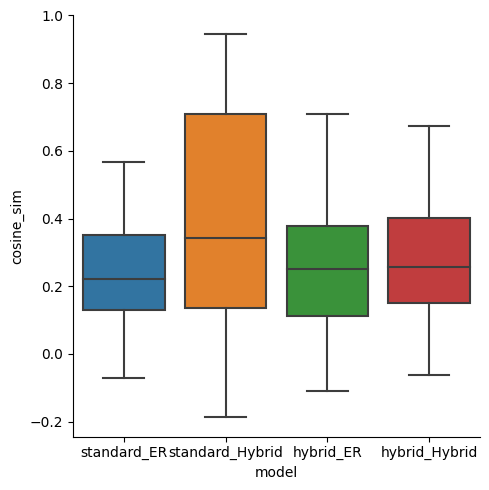

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

ax = sns.catplot(x="model", y="cosine_sim", kind="box", data=df_similar_so_cosin_sim)

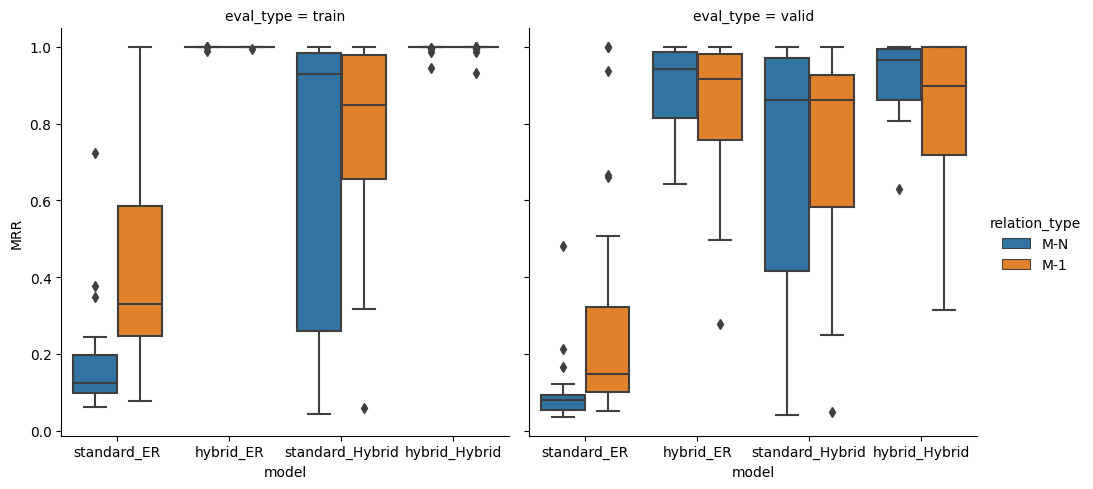

In [49]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

ax = sns.catplot(x="model", hue="relation_type", y="MRR", col="eval_type", kind="box", data=df_MRR[df_MRR.relation.isin(set_of_M1vsMN_relations)])

In [50]:
def rename_model(model):
    if model == 'standard_ER':
        return 'standard entity'
    if model == 'standard_Hybrid':
        return 'standard overall'
    if model == 'hybrid_ER':
        return 'hybrid entity'
    if model == 'hybrid_Hybrid':
        return 'hybrid overall'
    return model
df_MRR['model'] = df_MRR.model.map(lambda x: rename_model(x))

In [51]:
df_MRR

,relation,id,count,relation_type,eval_type,eval_metric,MRR,training_objective,model
0,/award/award_nominee/award_nominations./award/...,8,15989,M-N,train,ER,0.091224,standard,standard entity
1,/film/film/release_date_s./film/film_regional_...,13,12893,M-N,train,ER,0.102084,standard,standard entity
2,/award/award_nominee/award_nominations./award/...,19,12157,M-N,train,ER,0.296169,standard,standard entity
3,/people/person/profession,17,10945,M-N,train,ER,0.208030,standard,standard entity
4,/film/actor/film./film/performance/film,6,9494,M-N,train,ER,0.166321,standard,standard entity
...,...,...,...,...,...,...,...,...,...
218,/business/business_operation/operating_income....,213,1,M-1,valid,Hybrid,1.000000,hybrid,hybrid overall
219,/location/us_county/county_seat,190,1,1-1,valid,Hybrid,0.071429,hybrid,hybrid overall
220,/celebrities/celebrity/celebrity_friends./cele...,119,1,M-N,valid,Hybrid,0.125000,hybrid,hybrid overall
221,/location/hud_county_place/county,111,1,M-1,valid,Hybrid,1.000000,hybrid,hybrid overall


<Figure size 1800x5400 with 0 Axes>

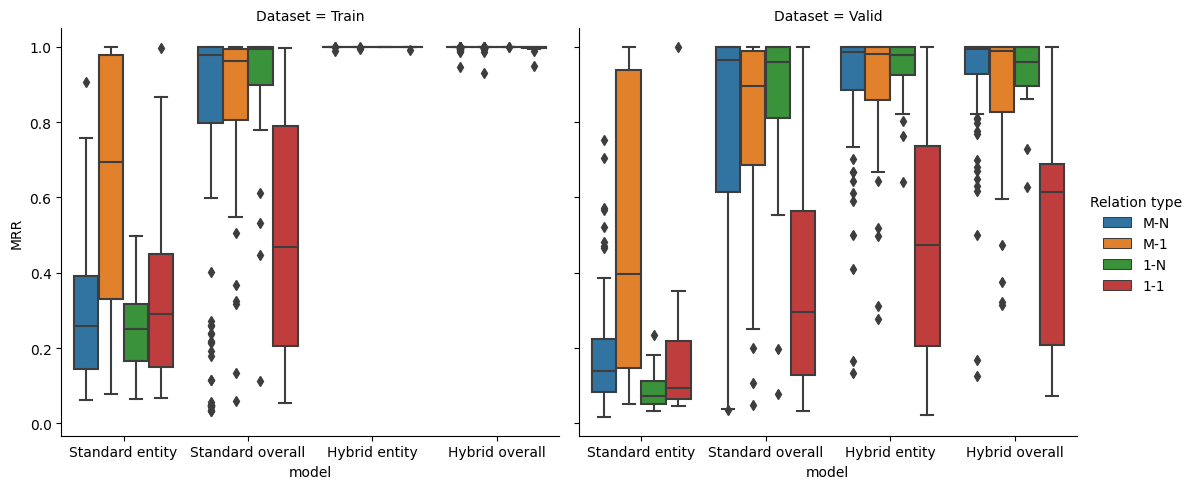

In [54]:
plt.figure(figsize=(10, 30), dpi=180)
df_MRR['eval_type'] = df_MRR.eval_type.map(lambda x: x.capitalize())
df_MRR['model'] = df_MRR.model.map(lambda x: x.capitalize())
ax = sns.catplot(x="model", hue="Relation type", y="MRR", col="Dataset", 
                 kind="box", data=df_MRR.rename(columns={'eval_type': 'Dataset', 'relation_type': 'Relation type'}),
                 order=['Standard entity', 'Standard overall', 'Hybrid entity', 'Hybrid overall'], 
                 height=5, aspect=1.1)

In [16]:
df_MRR[(df_MRR.model == 'standard_ER') & (df_MRR.relation_type == '1-1') & (df_MRR.eval_type == 'train')].MRR.median() 

0.2900858865657323